# EVAL Problem 1

In this EVAL assignment we will understand how seemingly insignificant changes in the input traffic distribution can lead to measurable differences in the behavior of queues and thus in the perceived service.

In [42]:
# Import Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

-----
a) In the previous EVAL assignment, you discovered that the client sends requests to the server with inter-arrival times that are exponentially distributed with mean $1/\lambda$ where $\lambda$ is the arrival rate passed via the parameter `-a`. Also, the request lengths are exponentially distributed with mean $1/\mu$ where $\mu$ is the service rate passed via the parameter `-s`. Great! But as it turns out, that’s just the *default* behavior of the client. Let’s discover what else the client can do.  

Which distribution the client uses is controller with an extra parameter `-d <dist. number>`, where `<dist. number>` is a number from 0 to 2. When passing `-d 0` you will be using the default exponential distribution. But what are the other two distributions? And does the `-d <dist.number>` parameter control both inter-arrival and service times?

To begin answering these questions, run your server and client with the following parameters (let it run, it will take about 5 minutes):

`./server_lim -q 1000 2222 & ./client -a 4.5 -s 5 -n 1500 -d 1 2222`

Notice that the client is requested to generate traffic according to distribution 1. Just like you did in HW2, plot the experimental data of inter-arrival times and request lengths and recover the type and
parameters of the distributions used by the client when `-d 1` is passed.

Hint: *there is some guesswork involved in recovering the distribution parameters. Start by looking at the shape of the distribution produced by the collected data and make a guess about which distribution
might be. Setting the mean will be easy if you think about it. If there is a standard deviation to set, explore integer fractions or multiples of the mean.*

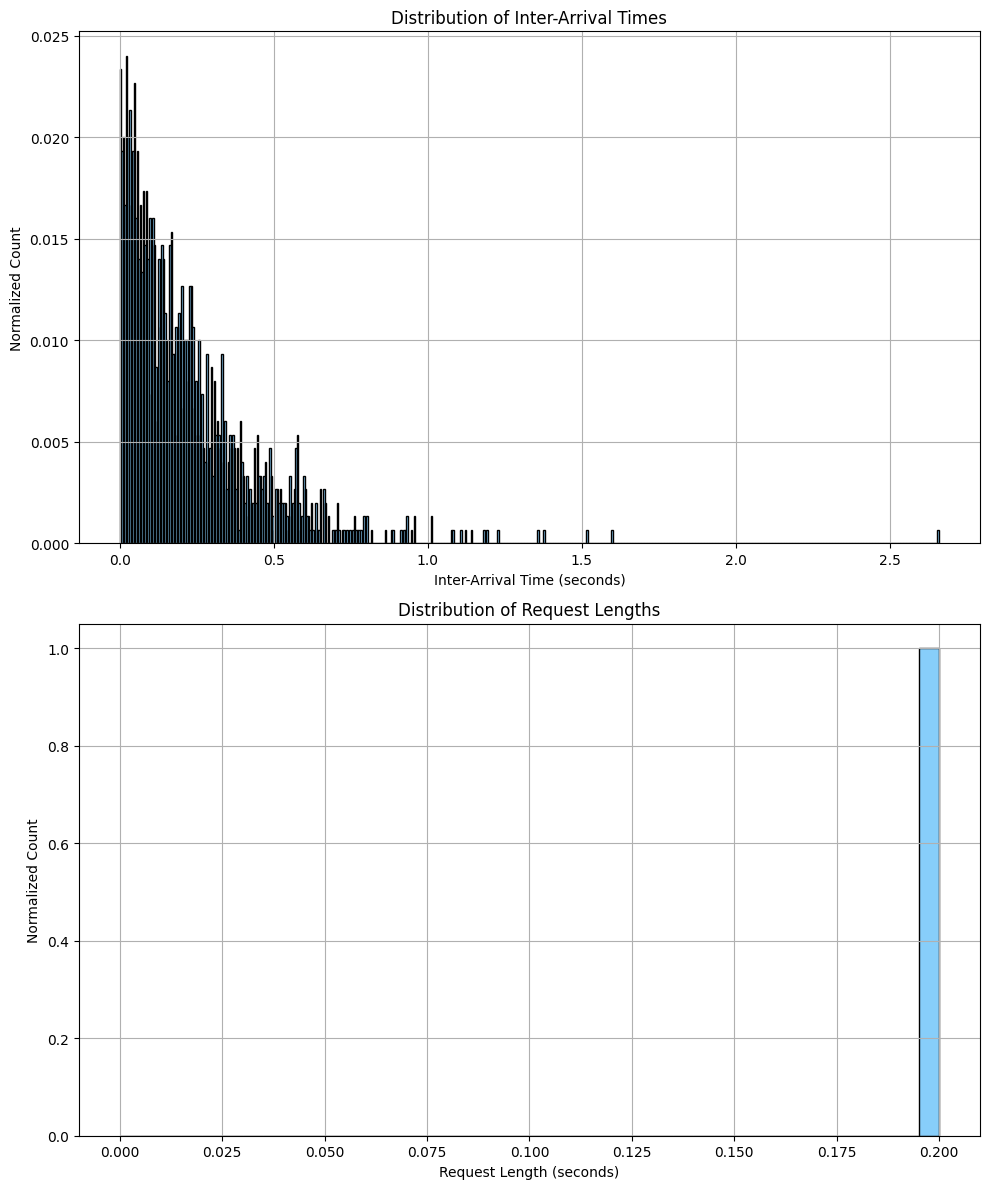

Inter-Arrival Times:
Mean: 0.2189, Standard Deviation: 0.2183
Request Lengths:
Mean: 0.2000, Standard Deviation: 0.0000


In [43]:
# --- Extract Sent Timestamps ---
!grep "^R" ./partA/output.txt | awk -F',' '{print $1}' | awk -F':' '{print $2}' > ./partA/ts.txt

# --- Extract Request Lengths --- 
!grep "^R" ./partA/output.txt | awk -F',' '{print $2}' > ./partA/req.txt

# Read sent timestamps from the file
sent_timestamps = []
with open('./partA/ts.txt') as f:
	for line in f:
		sent_timestamps.append(float(line.strip()))

# Compute inter-arrival times
inter_arrival_times = []
for i in range(1, len(sent_timestamps)):
	inter_arrival_time = sent_timestamps[i] - sent_timestamps[i - 1]
	inter_arrival_times.append(inter_arrival_time)

# Read request lengths from the file
request_lengths = []
with open('./partA/req.txt') as f:
	for line in f:
		request_lengths.append(float(line.strip()))

# Define bins 
bin_size = 0.005
max_val = max(request_lengths) + bin_size
bins = np.arange(0, max_val, bin_size)

# Define bins for inter-arrival times
max_value = max(inter_arrival_times) + bin_size
bins_inter_arrival = np.arange(0, max_value, bin_size)

# Histogram for inter-arrival times
hist_inter_arrival, bin_edges_inter_arrival = np.histogram(inter_arrival_times, bins=bins_inter_arrival)
hist_normalized_inter_arrival = hist_inter_arrival / len(inter_arrival_times)  # Normalize by total number of inter-arrival times

# Histogram for request lengths
hist, bin_edges = np.histogram(request_lengths, bins=bins)
hist_normalized_lengths = hist / len(request_lengths)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plotting Inter-Arrival Times
ax1.bar(bin_edges_inter_arrival[:-1], hist_normalized_inter_arrival, width=bin_size, color="lightskyblue", edgecolor='black', align='edge')
ax1.set_xlabel('Inter-Arrival Time (seconds)')
ax1.set_ylabel('Normalized Count')
ax1.set_title('Distribution of Inter-Arrival Times')
ax1.grid(True)

# Plotting Request Lengths
ax2.bar(bin_edges[:-1], hist_normalized_lengths, width=bin_size, color="lightskyblue", edgecolor='black', align='edge')
ax2.set_xlabel('Request Length (seconds)')
ax2.set_ylabel('Normalized Count')
ax2.set_title('Distribution of Request Lengths')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Convert lists to NumPy arrays
inter_arrival_times = np.array(inter_arrival_times)
request_lengths = np.array(request_lengths)

# Calculate mean and standard deviation for inter-arrival times
inter_arrival_mean = np.mean(inter_arrival_times)
inter_arrival_std = np.std(inter_arrival_times)

# Calculate mean and standard deviation for request lengths
request_mean = np.mean(request_lengths)
request_std = np.std(request_lengths)

# Print the results
print(f"Inter-Arrival Times:\nMean: {inter_arrival_mean:.4f}, Standard Deviation: {inter_arrival_std:.4f}")
print(f"Request Lengths:\nMean: {request_mean:.4f}, Standard Deviation: {request_std:.4f}")

The data on the inter-arrival times followed an exponential distribution, confirming that it adhered to the characteristics of a Poisson process. Conversely, the request lengths appeared as a vertical line, indicating a constant length. 

Given that the inter-arrival times followed an exponential distribution with an arrival rate ($\lambda$) of 4.5 (set by `-a` parameter), the mean of the distribution would be $1/\lambda = 1/4.5 \approx 0.22$. For exponential distributions, the standard deviation ($\sigma$) is directly related to the mean, thus the standard deviation for the inter-arrival times is also $1/\lambda = 1/4.5 \approx 0.22$. 

For the request lengths, it was observed to be a vertical line in the plot, suggesting that the data points are constant. In the case where all the request lengths are exactly the same (0.2), the standard deviation would be 0 since there's no variability, with the mean being $0.2$ in this case. 

-----
b) Do the same as above to recover the parameters of distribution number 2. In a similar way as above, collect and post-process the server output data generated by the following parameter:

`./server_lim -q 1000 2222 & ./client -a 4.5 -s 5 -n 1500 -d 2 2222`

When decoding the distributions used by the client and their parameters, make conclusive statements about the distribution type for both inter-arrival times and service lengths, and explicitly state their
mean and standard deviation parameters.

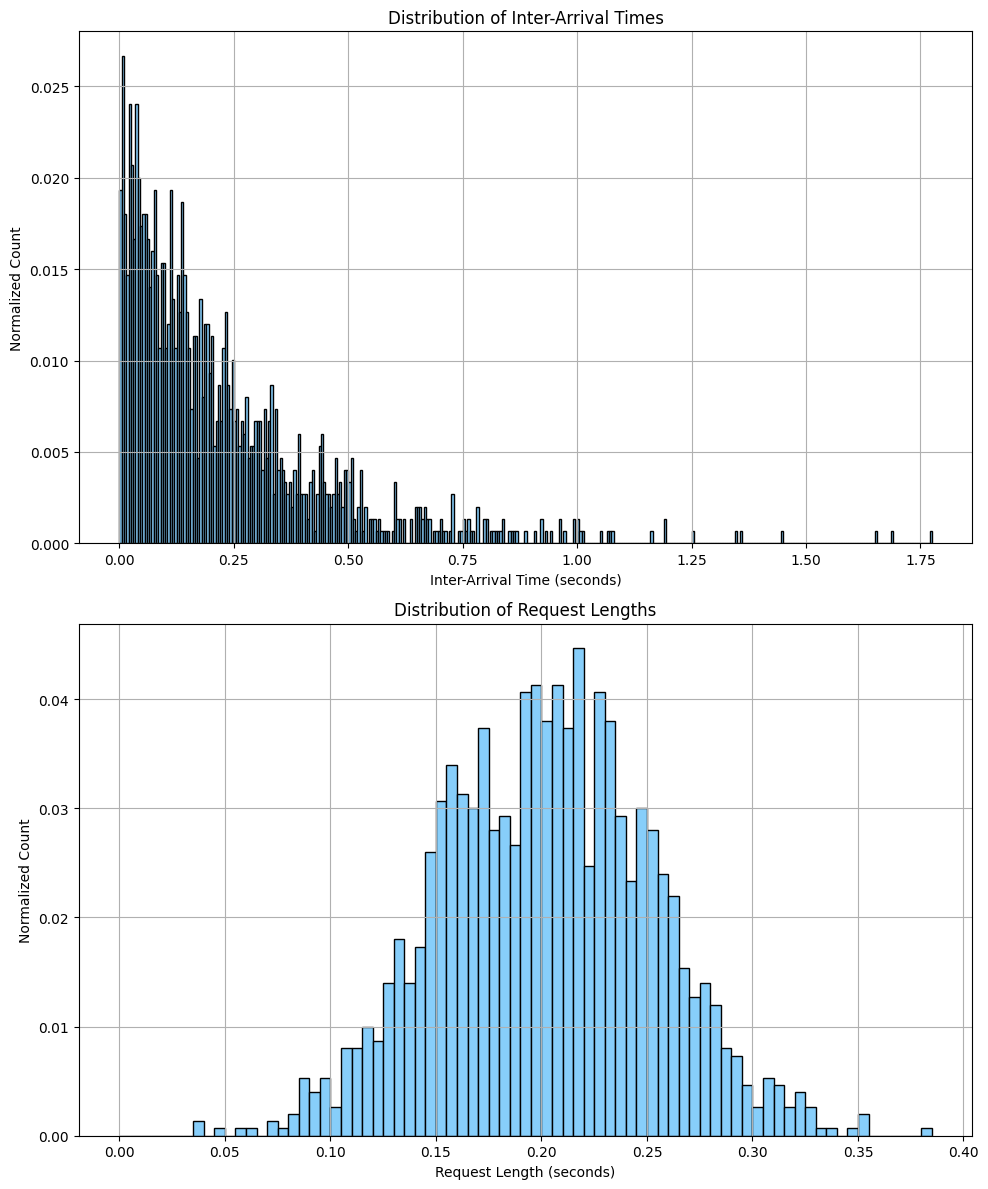

Inter-Arrival Times:
Mean: 0.2194, Standard Deviation: 0.2222
Request Lengths:
Mean: 0.2022, Standard Deviation: 0.0504


In [44]:
# --- Extract Sent Timestamps ---
!grep "^R" ./partB/output.txt | awk -F',' '{print $1}' | awk -F':' '{print $2}' > ./partB/ts.txt

# --- Extract Request Lengths --- 
!grep "^R" ./partB/output.txt | awk -F',' '{print $2}' > ./partB/req.txt

# Read sent timestamps from the file
sent_timestamps = []
with open('./partB/ts.txt') as f:
	for line in f:
		sent_timestamps.append(float(line.strip()))

# Compute inter-arrival times
inter_arrival_times = []
for i in range(1, len(sent_timestamps)):
	inter_arrival_time = sent_timestamps[i] - sent_timestamps[i - 1]
	inter_arrival_times.append(inter_arrival_time)

# Read request lengths from the file
request_lengths = []
with open('./partB/req.txt') as f:
	for line in f:
		request_lengths.append(float(line.strip()))

# Define bins 
bin_size = 0.005
max_val = max(request_lengths) + bin_size
bins = np.arange(0, max_val, bin_size)

# Define bins for inter-arrival times
max_value = max(inter_arrival_times) + bin_size
bins_inter_arrival = np.arange(0, max_value, bin_size)

# Histogram for inter-arrival times
hist_inter_arrival, bin_edges_inter_arrival = np.histogram(inter_arrival_times, bins=bins_inter_arrival)
hist_normalized_inter_arrival = hist_inter_arrival / len(inter_arrival_times)  # Normalize by total number of inter-arrival times

# Histogram for request lengths
hist, bin_edges = np.histogram(request_lengths, bins=bins)
hist_normalized_lengths = hist / len(request_lengths)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plotting Inter-Arrival Times
ax1.bar(bin_edges_inter_arrival[:-1], hist_normalized_inter_arrival, width=bin_size, color="lightskyblue", edgecolor='black', align='edge')
ax1.set_xlabel('Inter-Arrival Time (seconds)')
ax1.set_ylabel('Normalized Count')
ax1.set_title('Distribution of Inter-Arrival Times')
ax1.grid(True)

# Plotting Request Lengths
ax2.bar(bin_edges[:-1], hist_normalized_lengths, width=bin_size, color="lightskyblue", edgecolor='black', align='edge')
ax2.set_xlabel('Request Length (seconds)')
ax2.set_ylabel('Normalized Count')
ax2.set_title('Distribution of Request Lengths')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Convert lists to NumPy arrays
inter_arrival_times = np.array(inter_arrival_times)
request_lengths = np.array(request_lengths)

# Calculate mean and standard deviation for inter-arrival times
inter_arrival_mean = np.mean(inter_arrival_times)
inter_arrival_std = np.std(inter_arrival_times)

# Calculate mean and standard deviation for request lengths
request_mean = np.mean(request_lengths)
request_std = np.std(request_lengths)

# Print the results
print(f"Inter-Arrival Times:\nMean: {inter_arrival_mean:.4f}, Standard Deviation: {inter_arrival_std:.4f}")
print(f"Request Lengths:\nMean: {request_mean:.4f}, Standard Deviation: {request_std:.4f}")

The data on the inter-arrival times still resembles an exponential distribution, as evident from the steep decline at shorter intervals, though this distribution seems to have a slightly longer tail than in `-d 1`. Conversely, the request lengths now follows a normal (Gaussian) distribution. The bell-shaped curve is symmetric and centered around 0.2 seconds. 

Given that the inter-arrival times followed an exponential distribution with an arrival rate ($\lambda$) of 4.5 (set by `-a` parameter), the mean of the distribution would be $1/\lambda = 1/4.5 \approx 0.22$. For exponential distributions, the standard deviation ($\sigma$) is directly related to the mean, thus the standard deviation for the inter-arrival times is also $1/\lambda = 1/4.5 \approx 0.22$. 

For the request lengths, it was observed to be a bell-shaped curve centered around 0.2 seconds. According to the output data, the mean would be 0.2, with the standard deviation being 0.05. 

-----
c) We are now ready to see how different distributions affect the quality of service in our simple FIFO server. Let us focus on the comparison between an exponential distribution and whatever distribution 1 is. Run and collect experimental data for the following template command:

`./server_lim -q 1000 2222 & ./client -a <arr. rate> -s 20 -n 1500 -d 0 2222`

where `<arr. rate>` is varied from (and including) 10 up until 19. Notice that these experiments will ask the client to use an exponential distribution (`-d 0`). Use this set of experiments to produce a plot
of the average response time as a function of the server utilization—in a way similar to what you did in HW1.

Overlap on the same plot produced above the curve obtained by post-processing in the same exact way the results coming from running the following template command:

`./server_lim -q 1000 2222 & ./client -a <arr. rate> -s 20 -n 1500 -d 1 2222`

where once again `<arr. rate>` is varied from (and including) 10 up until 19. What can you conclude about the quality service perceived by the user when the load (a.k.a. its utilization) is comparable and
only the distribution of the traffic characteristics changes?

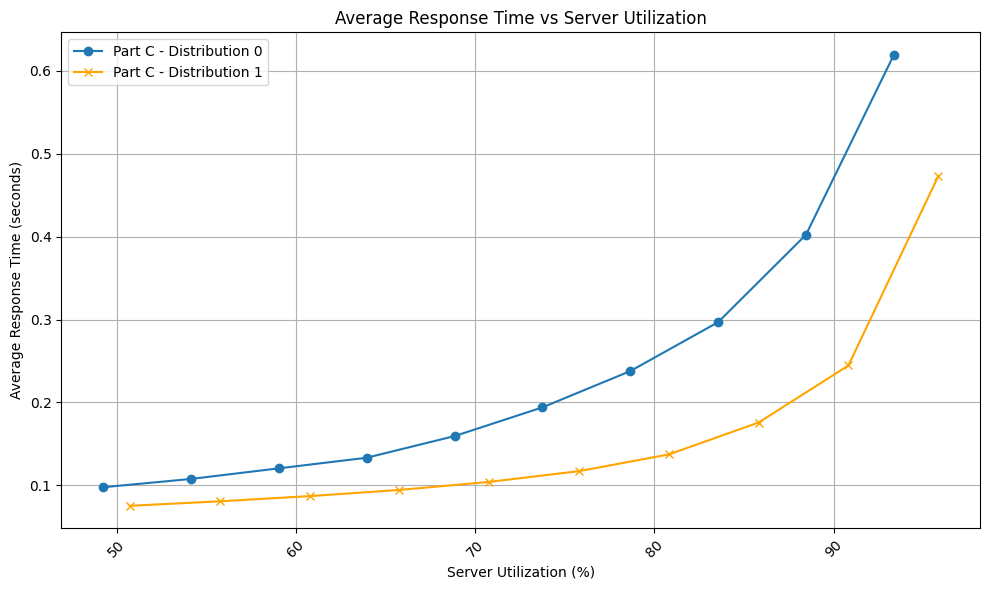

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to load and prepare data
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Utilization'] = pd.to_numeric(df['Utilization'], errors='coerce') * 100  # Convert to percentage
    df['AverageResponseTime'] = pd.to_numeric(df['AverageResponseTime'], errors='coerce')
    df = df.dropna()  # Drop any rows with NaN values
    df = df.sort_values('Utilization')  # Sort by Utilization
    return df

# Load datasets
df_d0 = load_data('./partC_d0/server_log_summary.csv')
df_d1 = load_data('./partC_d1/server_log_summary.csv')

# Create evenly spaced utilization values for both datasets
utilization_values_d0 = np.linspace(df_d0['Utilization'].min(), df_d0['Utilization'].max(), num=10)
utilization_values_d1 = np.linspace(df_d1['Utilization'].min(), df_d1['Utilization'].max(), num=10)

# Interpolate to get corresponding response times
response_times_d0 = np.interp(utilization_values_d0, df_d0['Utilization'], df_d0['AverageResponseTime'])
response_times_d1 = np.interp(utilization_values_d1, df_d1['Utilization'], df_d1['AverageResponseTime'])

# Plotting
plt.figure(figsize=(10, 6))

# Plot for partC_d0
plt.plot(utilization_values_d0, response_times_d0, marker='o', linestyle='-', label='Distribution 0')

# Plot for partC_d1
plt.plot(utilization_values_d1, response_times_d1, marker='x', linestyle='-', label='Distribution 1', color='orange')

plt.title('Average Response Time vs Server Utilization')
plt.xlabel('Server Utilization (%)')
plt.ylabel('Average Response Time (seconds)')
plt.xticks(rotation=45)
plt.grid()
plt.legend() 
plt.tight_layout()
plt.show()


Based on the graph, distribution 0 `-d 0` shows an increase in average response time as server utilization approaches higher percentages. The curve is steep, indicating a more rapid increase in response itme with increased utilization. As the server becomes more heavily utilized, users experience significantly higher response times. This indicates that the server's performance degrades faster with this distribution under high load.

Distribution 1 (`-d 1`) shows an average response time that is generally lower compared to the exponential distribution at the same levels of server utilization. The increase in response time is more gradual compared to distribution 0 (`-d 0`). This distribution appears to handle higher utilization more gracefully, resulting in better perceived quality of service under heavy load conditions.

If maintaining lower response times under high utilization is critical, Distribution 1 might be preferable over an exponential distribution due to its more favorable performance characteristics.

-----
d)  Let us now explore what happens when the queue has a constrained size. To do that, run the following command:

`./server_lim -q 10 2222 & ./client -a 19.6 -s 20 -n 1500 -d 0 2222`

Post-process the server output to understand what happened to our requests. First, calculate the ratio of requests that get rejected over the total. Next, plot the distribution of the inter-rejection time,
i.e. the time that elapses between a rejection and the next. What does that distribution look like? Do not recover the parameters of the distribution, but simply share your insights on the shape of the
distribution.

Rejection Ratio: 0.05333333333333334


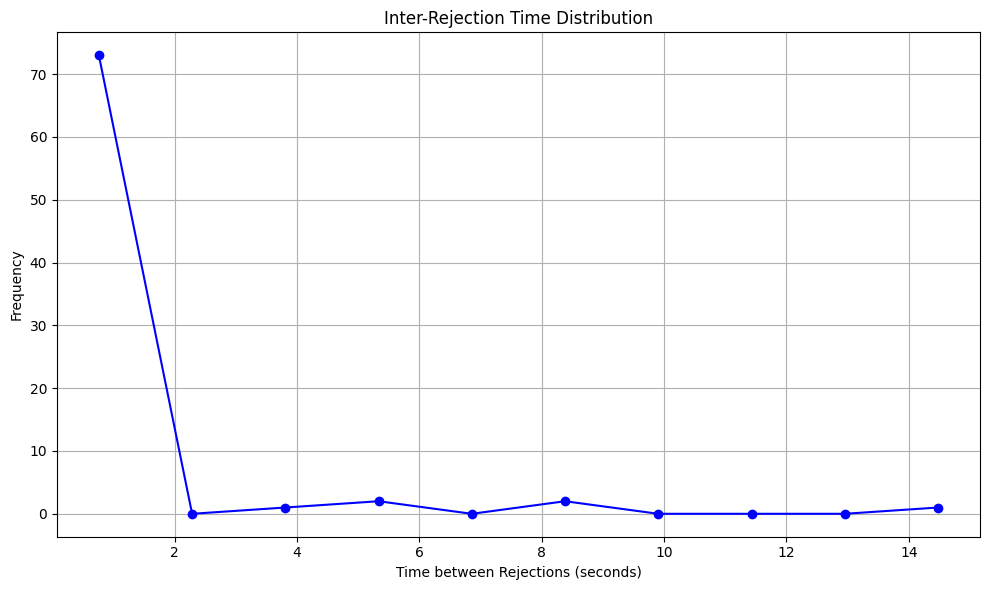

In [20]:
import re
import matplotlib.pyplot as plt
import numpy as np

# Read the file
with open('./partD/output.txt', 'r') as file:
    output_data = file.read()

# Extract all lines starting with X and R
rejected_lines = re.findall(r'X\d+:\d+\.\d+,\d+\.\d+,\d+\.\d+', output_data)
total_lines = re.findall(r'[XR]\d+:\d+\.\d+', output_data)

# Calculate rejection ratio
rejection_ratio = len(rejected_lines) / len(total_lines)

# Extract reject timestamps
reject_timestamps = [float(line.split(',')[2]) for line in rejected_lines]

# Calculate inter-rejection times
inter_rejection_times = [t2 - t1 for t1, t2 in zip(reject_timestamps[:-1], reject_timestamps[1:])]

print(f"Rejection Ratio: {rejection_ratio}")

# Sort inter-rejection times for the line graph
sorted_inter_rejection_times = sorted(inter_rejection_times)
frequencies, bin_edges = np.histogram(sorted_inter_rejection_times, bins=10)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  

# Plotting the distribution as a line graph
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, frequencies, marker='o', linestyle='-', color='blue')
plt.title('Inter-Rejection Time Distribution')
plt.xlabel('Time between Rejections (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


The sharp drop-off after the initial peak shows a exponential-like decay, where the likelihood of longer inter-rejection times diminishes rapidly. From the experiment, the rejection ratio was approximately 0.533, meaning that around 5.33% (80/1500) of the total rejections were rejected.

The distribution shows that rejections happen with very short intervals (less than 2 seconds), as indicated by the high frequency at the start. After this initial peak, the frequency of rejections occurring over longer time intervals (greater than 2 seconds) drops significantly, resulting in a sparse distribution. There are occasional rejections at varying intervals between 4 and 14 seconds, but they are relatively rare compared to the cluster near the lower time bounds.

-----
e) Repeat the same analysis as above, when distribution number 1 is used instead, thus by running the following command:

`./server_lim -q 10 2222 & ./client -a 19.6 -s 20 -n 1500 -d 1 2222`

If you compare the new rejection rate and shape of the distribution, would you conclude that the new system (the one that uses `-d 1`) offers a better or worse service to its users?

Rejection Ratio: 0.04466666666666667


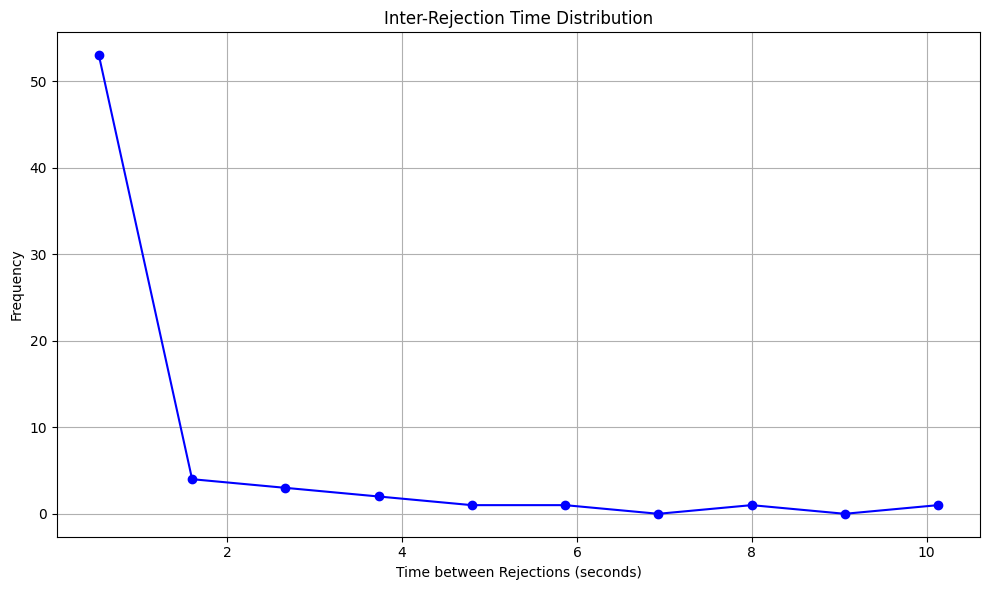

In [22]:
import re
import matplotlib.pyplot as plt
import numpy as np

# Read the file
with open('./partE/output.txt', 'r') as file:
    output_data = file.read()

# Extract all lines starting with X and R
rejected_lines = re.findall(r'X\d+:\d+\.\d+,\d+\.\d+,\d+\.\d+', output_data)
total_lines = re.findall(r'[XR]\d+:\d+\.\d+', output_data)

# Calculate rejection ratio
rejection_ratio = len(rejected_lines) / len(total_lines)

# Extract reject timestamps
reject_timestamps = [float(line.split(',')[2]) for line in rejected_lines]

# Calculate inter-rejection times
inter_rejection_times = [t2 - t1 for t1, t2 in zip(reject_timestamps[:-1], reject_timestamps[1:])]

print(f"Rejection Ratio: {rejection_ratio}")

# Sort inter-rejection times for the line graph
sorted_inter_rejection_times = sorted(inter_rejection_times)
frequencies, bin_edges = np.histogram(sorted_inter_rejection_times, bins=10)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  

# Plotting the distribution as a line graph
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, frequencies, marker='o', linestyle='-', color='blue')
plt.title('Inter-Rejection Time Distribution')
plt.xlabel('Time between Rejections (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


The new system using `-d 1` has a lower rejection rate (4.47% (67/1500) compared to `-d 0` with 5.33%), which indicates that fewer requests are rejected under the new configuration. This suggests that the system might be handling user requests more efficiently. The system using `-d 1` seems to provide better service to its users. The lower rejection ratio indicates fewer denials of service, and the smoother, less frequent occurrence of rejections at longer intervals suggests a more evenly distributed load.

Both distributions exhibit a similar shape with a sharp peak at the beginning (indicating many rejections in short succession) and a steep drop-off, which suggests that most rejections occur within a very short time interval. However, in the new system (`-d 1`), the peak frequency is lower (around 50 rejections) than in the previous case, where it was around 70. This further supports the observation that the system is rejecting fewer requests overall. 


